## Introduction

The Dataset that is being analyzed and trained with is a Regression Dataset that I downloaded from Kaggle in order to demonstrate the all of stages of ML model training like,

1. Data Acquisition
    - loading structured data from csv, excel, SQL db, APIs or scraping the web.

2. Initial Data Analysis
    - Use .info(), .describe(), check null values.
    - Plot class distribution for classification problems.
    - Use pandas_profiling, sweetviz, or dtale for EDA reports.

3. Data Cleaning
    - Handle missing values (drop, mean/median imputation).
    - Remove or merge duplicates.
    - Handle inconsistent formats: dates, strings, booleans.
    - Outlier detection: IQR, Z-score, visual inspection via boxplots.

4. Feature Engineering
    - Encode categorical variables (Label, OneHot, Target).
    - Extract date/time features (month, weekday, etc.).
    - Binning (e.g., age groups).
    - Domain-driven feature creation.

5. Normalization or Scaling
    - Show histograms before and after scaling

6. Class balancing
    - Visualize imbalance (value_counts(), pie chart, bar plot).
    - Apply:
        - SMOTE (Synthetic Minority Oversampling Technique)
        - RandomOverSampler
        - class_weight='balanced'

7. Feature Selection/Elimination
    - Correlation matrix or Heatmap

8. ML Model selection
    - Try multiple models like - Logistic Regression, Decision Tree, Random Forest, XGBoost, SVM, K-Nearest Neighbors

9. Experimentation + Evaluation
    - Use:
        - train_test_split
        - cross_val_score
        - GridSearchCV, RandomizedSearchCV
    - Build Pipeline for preprocessing + training.
    - Evaluate using:
        - Accuracy, Precision, Recall, F1-Score
        - Confusion Matrix, ROC-AUC

10. Best Model Selection
    - Summarize results of all models in a DataFrame.
    - Use plots (e.g., bar chart) to compare metrics.
    - Pick best model based on:
        - Metric (e.g., recall for fraud detection)
        - Business impact

11. Finally the Best model would be evaluated, selected and pushed to MlFlow registry. And possibly serve in an Endpoint.

## 1. Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

RANDOM_STATE = 2049

Testing set is ignored because of the absence of the True value. Further on, train.csv will be splitted for train/cv/test datasets.

In [2]:
df = pd.read_csv("Datasets/Space_Titanic/train.csv")
# test_data = pd.read_csv("Datasets/Space_Titanic/test.csv")

submission = pd.read_csv("Datasets/Space_Titanic/sample_submission.csv")
df.sample(10, random_state=RANDOM_STATE)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7785,8314_01,Europa,False,D/245/S,TRAPPIST-1e,30.0,False,0.0,640.0,0.0,31.0,6201.0,Altairk Folumorly,False
6019,6367_01,Mars,False,F/1215/S,TRAPPIST-1e,30.0,True,1960.0,0.0,638.0,0.0,0.0,Hal Botte,False
724,0767_01,Earth,False,G/116/S,TRAPPIST-1e,49.0,False,0.0,6.0,679.0,15.0,187.0,Francy Meltonway,False
8404,8986_01,Earth,False,E/590/S,TRAPPIST-1e,19.0,False,0.0,810.0,21.0,788.0,NaN,Neilda Kirklander,False
6575,6934_02,Mars,False,E/443/P,55 Cancri e,16.0,False,1228.0,0.0,450.0,446.0,NaN,Bleark Nutty,False
7705,8222_01,Mars,False,D/257/P,TRAPPIST-1e,43.0,False,1054.0,109.0,576.0,645.0,0.0,Muld Sidie,False
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True
5079,5424_02,NaN,False,E/342/P,TRAPPIST-1e,64.0,False,469.0,700.0,2.0,1.0,0.0,Docks Dal,False
7338,7852_01,Earth,False,E/508/P,TRAPPIST-1e,15.0,False,0.0,6.0,0.0,981.0,0.0,Davisy Folemonley,False
8198,8766_01,Mars,True,F/1807/P,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,0.0,Fles Mine,True


## 2. Initial Data Analysis

In [3]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Checking Missing values**

This is the number of null values in each of the column of the Data Frame. Around 2% of the training examples have missing values.

In [6]:
(df.isnull().sum() / len(df)) * 100

# df.FoodCourt[ df.FoodCourt.isna() ]

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

All of the NaN values are set to True(or 1.0) here

<Axes: >

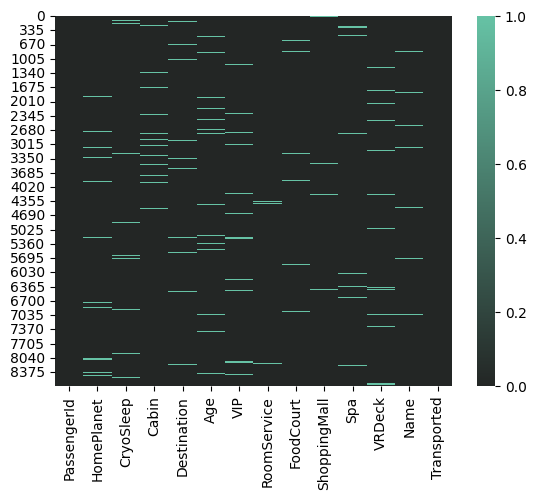

In [7]:
# sns.heatmap(df.isnull(), cbar=True, color=sns.color_palette("Set2")[0])

sns.heatmap(df.isnull(), cbar=True, cmap=sns.dark_palette(sns.color_palette("Set2")[0], as_cmap=True))

## 3. Data Cleaning

Convert the column types from - String, Boolean, etc. to Numerical.